**SciPy tratar con datos**
1. Introducción
2. Librería scipy.sparse
3. Librería scipy.sparse.csgraph (GRAFOS)
4. Librería scipy.spatial


In [1]:
# Sparse Data: Utilizar datos escasos o densos
import numpy as np
from scipy.sparse import csr_matrix
arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])
# Print the position of every value 1 is position (0,5), 1 is in position (0,6), ..
print(csr_matrix(arr))

  (np.int32(0), np.int32(5))	1
  (np.int32(0), np.int32(6))	1
  (np.int32(0), np.int32(8))	2


In [2]:
# contar zeros, eliminar zeros, eliminar duplicados
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])
mat = csr_matrix(arr)
print(mat.count_nonzero())
print(mat)
mat.eliminate_zeros()
print(mat)
mat.sum_duplicates()

print(mat)


3
  (np.int32(1), np.int32(2))	1
  (np.int32(2), np.int32(0))	1
  (np.int32(2), np.int32(2))	2
  (np.int32(1), np.int32(2))	1
  (np.int32(2), np.int32(0))	1
  (np.int32(2), np.int32(2))	2
  (np.int32(1), np.int32(2))	1
  (np.int32(2), np.int32(0))	1
  (np.int32(2), np.int32(2))	2


In [3]:
# sparse.csgraph Adjacency
from scipy.sparse.csgraph import connected_components
arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])
newarr = csr_matrix(arr)
print(connected_components(newarr))

(1, array([0, 0, 0], dtype=int32))


In [4]:
# shortest path between elements in graph
from scipy.sparse.csgraph import dijkstra, floyd_warshall
arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])
newarr = csr_matrix(arr)
print(dijkstra(newarr, return_predecessors=True, indices=0))
print(floyd_warshall(newarr, return_predecessors=True))

(array([0., 1., 2.]), array([-9999,     0,     0], dtype=int32))
(array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]], dtype=int32))


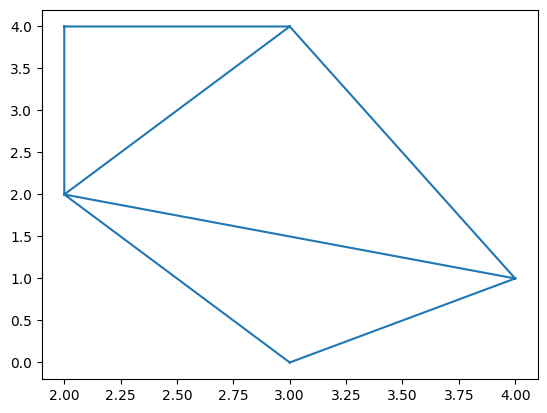

In [5]:
# Working with spatial data
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
])
simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)

plt.show()

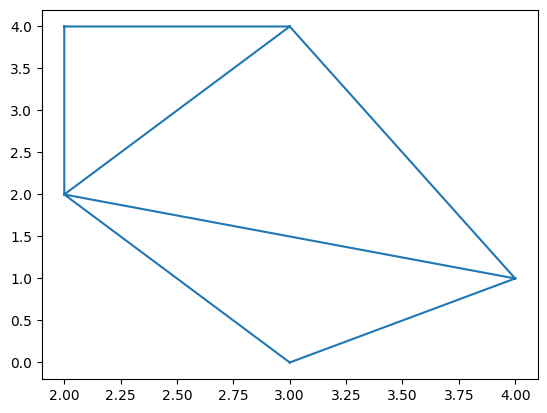

In [6]:
# Delaunay triangulation
x_s = np.array([2,3,3,2,4])
y_s = np.array([4,4,0,2,1])
plt.triplot(x_s, y_s)
plt.show()

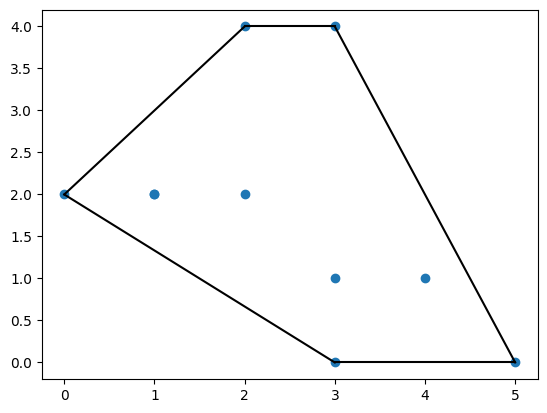

In [7]:
# The smallest polygon
from scipy.spatial import ConvexHull

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])
# Create convex hull
hull = ConvexHull(points)
hull_points = hull.simplices
# paint points
plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  # paint lines
  plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

(2.0, np.int64(0))


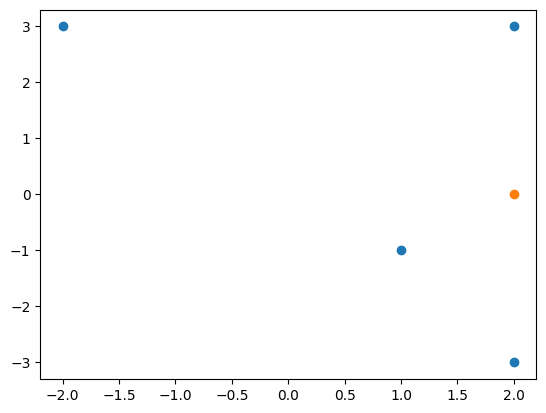

In [8]:
# The nearest neighbor
from scipy.spatial import KDTree
from scipy.spatial import cKDTree
points = [(1, -1), (2, 3), (-2, 3), (2, -3)]
np_array = np.array(points)
kdtree = KDTree(points)
plt.scatter(np_array[:,0], np_array[:,1])
res = kdtree.query((1, 1))
plt.scatter(res[0], res[1])
print(res)
plt.show()

In [9]:
items = np.array([0, 1, 2, 4])
ckdtree_items = cKDTree(items[:, None])
print(ckdtree_items.query(6))

(2.0, 3)


In [10]:
# Euclidean Distance
from scipy.spatial.distance import euclidean
p1 = (1, 0)
p2 = (10, 2)
res = euclidean(p1, p2)
print(res)
h = ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**(1/2)
print(f"calculado por Pitágoras: {h:.2f}")

9.219544457292887
calculado por Pitágoras: 9.22


In [11]:
print(85**(1/2))

9.219544457292887
